# Name: Anila Desha

# Task -7 Stock Market Prediction using Numerical and Textual Analysis

In [1]:
## Importing Librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
from datetime import datetime

C:\Users\Anila\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
## Reading The files 
price = pd.read_csv('D:/BSESN.csv')
sent = pd.read_csv('D:/india-news-headlines.csv')

In [3]:
#Changing columns to lowercase
price.columns= price.columns.str.lower()

In [4]:
#Edting Number of Diaplyed Rows and Columns

pd.set_option("display.max_rows", 99)
pd.set_option("display.max_columns", 99)

In [5]:
#Gathering info on dataset

sent.info()
type(sent.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
publish_date         int64
headline_category    object
headline_text        object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


pandas.core.indexes.base.Index

In [6]:

#Adding Index as a column in dataset

sent['index'] = sent.index

In [7]:
sent.tail()

,publish_date,headline_category,headline_text,index
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india,3297167
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...,3297168
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...,3297169
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...,3297170
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...,3297171


In [8]:
sent.head()

,publish_date,headline_category,headline_text,index
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,0
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,1
2,20010102,unknown,Fissures in Hurriyat over Pak visit,2
3,20010102,unknown,America's unwanted heading for India?,3
4,20010102,unknown,For bigwigs; it is destination Goa,4


In [9]:
sent['publish_date'] = sent['publish_date'].astype(str) #for ease in joining

In [10]:
price['date'] = price['date'].astype(str) #for ease in joining

In [11]:
price = price.dropna()

# Filtering the Headlines Data

In [12]:
#Filtering only Relevant Columns

filter_list = ['business', 'business.india-business', 'business.international-business', 'business.personal-finance']
sent_2 = sent[sent.headline_category.isin(filter_list)]

In [13]:

sent_2.reset_index(inplace= True)

# Sentiment Analysis Using Vader

In [14]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Anila\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['publish_date', 'headline_category', 'headline_text']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(sent_2, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline_text'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['publish_date'] = pd.to_datetime(parsed_and_scored_news.publish_date).dt.date

parsed_and_scored_news.head()

,publish_date,headline_category,headline_text,compound,neg,neu,pos
0,2001-01-04,business.india-business,Car dealers caught in Bihar sales tax ruling,0.0000,0.0,1.000,0.000
1,2001-05-22,business.india-business,Re-negotiation best: Deshmukh; lenders' SOS to...,0.6369,0.0,0.588,0.412
2,2001-05-22,business.india-business,Samsung says hello to cellular unit in India,0.0000,0.0,1.000,0.000
3,2001-05-22,business.india-business,Govt lifts port-linked curbs on imports,0.0000,0.0,1.000,0.000
4,2001-05-22,business.india-business,RIL plans to mop up to Rs 1;000cr,0.0000,0.0,1.000,0.000


In [16]:
price.to_csv('price_f.csv')

In [18]:
pf = pd.read_csv('C:/Users/Anila/price_f.csv',index_col=0)

In [19]:
data = pf.join(parsed_and_scored_news, lsuffix='_caller', rsuffix='_other')
data.head()

,date,open,high,low,close,adj close,volume,publish_date,headline_category,headline_text,compound,neg,neu,pos
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0,2001-01-04,business.india-business,Car dealers caught in Bihar sales tax ruling,0.0000,0.0,1.000,0.000
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0,2001-05-22,business.india-business,Re-negotiation best: Deshmukh; lenders' SOS to...,0.6369,0.0,0.588,0.412
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0,2001-05-22,business.india-business,Samsung says hello to cellular unit in India,0.0000,0.0,1.000,0.000
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0,2001-05-22,business.india-business,Govt lifts port-linked curbs on imports,0.0000,0.0,1.000,0.000
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0,2001-05-22,business.india-business,RIL plans to mop up to Rs 1;000cr,0.0000,0.0,1.000,0.000


# Filtering Data for Analysis

In [20]:
data_f = data.drop(['headline_text', 'publish_date','headline_category'], axis = 1)
data_f.head()


,date,open,high,low,close,adj close,volume,compound,neg,neu,pos
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0,0.0000,0.0,1.000,0.000
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0,0.6369,0.0,0.588,0.412
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0,0.0000,0.0,1.000,0.000
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0,0.0000,0.0,1.000,0.000
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0,0.0000,0.0,1.000,0.000


In [21]:
data_f.to_csv('data_f.csv',index=False)

In [22]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [24]:
data_f = pd.read_csv('C:/Users/Anila/data_f.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [25]:
data_f.head()

,open,high,low,close,adj close,volume,compound,neg,neu,pos
date,,,,,,,,,,
2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0,0.0000,0.0,1.000,0.000
2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0,0.6369,0.0,0.588,0.412
2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0,0.0000,0.0,1.000,0.000
2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0,0.0000,0.0,1.000,0.000
2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0,0.0000,0.0,1.000,0.000


# Analysis

We use VAR method for prediction of stocks since we have a time series data which is multivariate in nature

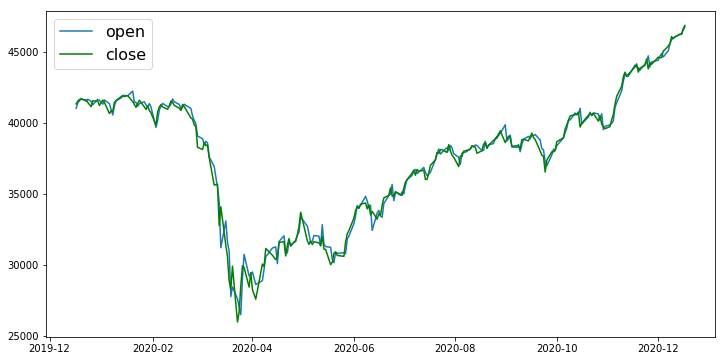

In [26]:
plt.figure(figsize=(12,6))
open_price, = plt.plot(data_f['open'])
close, = plt.plot(data_f['close'], color='green')
    
plt.legend(['open', 'close'], fontsize=16)
plt.show()

# Normalize The Data

In [27]:
avgs = data_f.mean()
devs = data_f.std()

In [28]:
for col in data_f.columns:
    data_f[col] = (data_f[col] - avgs.loc[col]) / devs.loc[col]

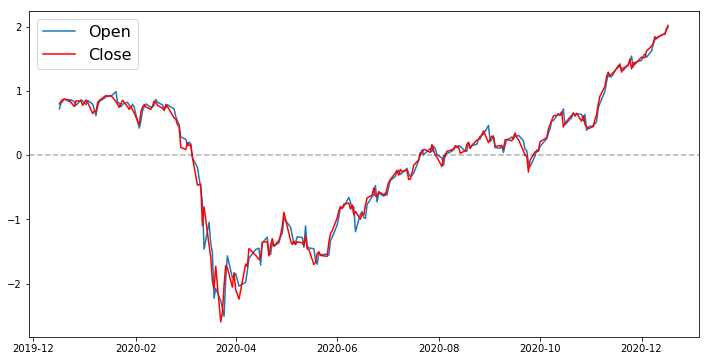

In [29]:
plt.figure(figsize=(12,6))
open_price, = plt.plot(data_f['open'])
close, = plt.plot(data_f['close'], color='red')

    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

plt.legend(['Open', 'Close'], fontsize=16)

# Taking First Difference to Remove Trend

In [30]:
data_f = data_f.diff().dropna()

In [31]:
data_f.head()

,open,high,low,close,adj close,volume,compound,neg,neu,pos
date,,,,,,,,,,
2019-12-18,0.086600,0.048647,0.076022,0.045509,0.045509,0.320430,2.465440,0.000000,-2.153514,2.75586
2019-12-19,0.028631,0.023858,0.021073,0.025434,0.025434,0.544127,-2.465440,0.000000,2.153514,-2.75586
2019-12-20,0.038682,0.020697,0.038671,0.001680,0.001680,0.018138,0.000000,0.000000,0.000000,0.00000
2019-12-23,-0.043908,-0.024730,-0.034752,-0.008573,-0.008573,-1.656564,0.000000,0.000000,0.000000,0.00000
2019-12-24,0.030224,0.000310,-0.011090,-0.039997,-0.039997,-0.108825,-1.057557,1.470296,-1.087211,0.00000


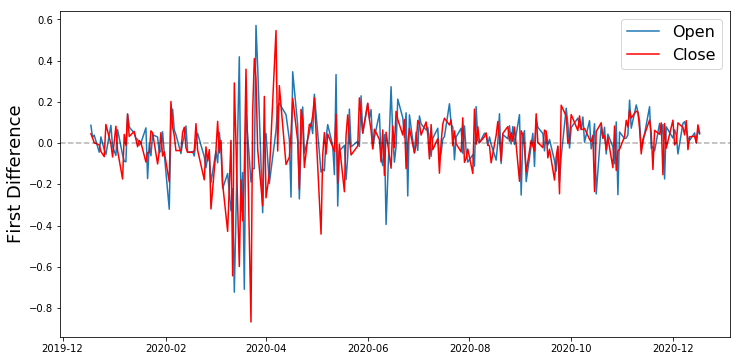

In [32]:
plt.figure(figsize=(12,6))
open_price, = plt.plot(data_f['open'])
close, = plt.plot(data_f['close'], color='red')
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Open', 'Close'], fontsize=16)

# Remove Increasing Volatility

In [33]:
annual_volatility = data_f.groupby(data_f.index.year).std()
list(annual_volatility.columns)

['open',
 'high',
 'low',
 'close',
 'adj close',
 'volume',
 'compound',
 'neg',
 'neu',
 'pos']

In [34]:
data_f['open_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'open'])
data_f['close_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'close'])
data_f['high_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'high'])
data_f['low_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'low'])
data_f['adj_close_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'adj close'])
data_f['volume_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'volume'])
data_f['neg_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'neg'])
data_f['neu_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'neu'])
data_f['pos_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'pos'])
data_f['compound_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'compound'])
data_f.head()

,open,high,low,close,adj close,volume,compound,neg,neu,pos,open_annual_vol,close_annual_vol,high_annual_vol,low_annual_vol,adj_close_annual_vol,volume_annual_vol,neg_annual_vol,neu_annual_vol,pos_annual_vol,compound_annual_vol
date,,,,,,,,,,,,,,,,,,,,
2019-12-18,0.086600,0.048647,0.076022,0.045509,0.045509,0.320430,2.465440,0.000000,-2.153514,2.75586,0.053269,0.051705,0.028383,0.048187,0.051705,0.621389,0.735148,1.358733,1.593552,1.447414
2019-12-19,0.028631,0.023858,0.021073,0.025434,0.025434,0.544127,-2.465440,0.000000,2.153514,-2.75586,0.053269,0.051705,0.028383,0.048187,0.051705,0.621389,0.735148,1.358733,1.593552,1.447414
2019-12-20,0.038682,0.020697,0.038671,0.001680,0.001680,0.018138,0.000000,0.000000,0.000000,0.00000,0.053269,0.051705,0.028383,0.048187,0.051705,0.621389,0.735148,1.358733,1.593552,1.447414
2019-12-23,-0.043908,-0.024730,-0.034752,-0.008573,-0.008573,-1.656564,0.000000,0.000000,0.000000,0.00000,0.053269,0.051705,0.028383,0.048187,0.051705,0.621389,0.735148,1.358733,1.593552,1.447414
2019-12-24,0.030224,0.000310,-0.011090,-0.039997,-0.039997,-0.108825,-1.057557,1.470296,-1.087211,0.00000,0.053269,0.051705,0.028383,0.048187,0.051705,0.621389,0.735148,1.358733,1.593552,1.447414


In [35]:
data_f['open'] = data_f['open'] / data_f['open_annual_vol']
data_f['close'] = data_f['close'] / data_f['close_annual_vol']
data_f['high'] = data_f['high'] / data_f['high_annual_vol']
data_f['low'] = data_f['low'] / data_f['low_annual_vol']
data_f['adj close'] = data_f['adj close'] / data_f['adj_close_annual_vol']
data_f['volume'] = data_f['volume'] / data_f['volume_annual_vol']
data_f['neg'] = data_f['neg'] / data_f['neg_annual_vol']
data_f['neu'] = data_f['neu'] / data_f['neu_annual_vol']
data_f['pos'] = data_f['pos'] / data_f['pos_annual_vol']
data_f['compound'] = data_f['compound'] / data_f['compound_annual_vol']

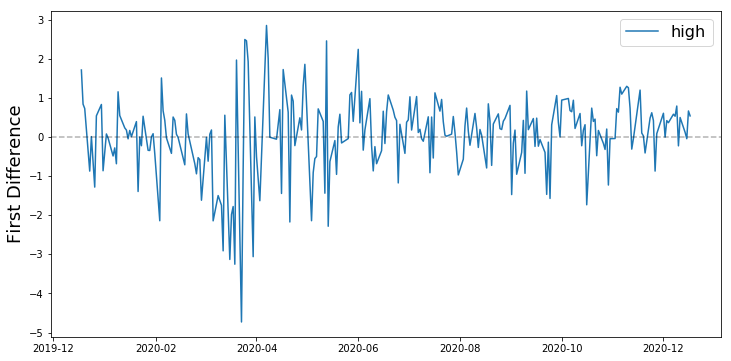

In [36]:

plt.figure(figsize=(12,6))
ice_cream, = plt.plot(data_f['high'])
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['high'], fontsize=16)

# Removing Seasonality

In [37]:
month_avgs = data_f.groupby(data_f.index.month).mean()
month_avgs

,open,high,low,close,adj close,volume,compound,neg,neu,pos,open_annual_vol,close_annual_vol,high_annual_vol,low_annual_vol,adj_close_annual_vol,volume_annual_vol,neg_annual_vol,neu_annual_vol,pos_annual_vol,compound_annual_vol
date,,,,,,,,,,,,,,,,,,,,
1,-0.032070,-0.038679,-0.037582,-0.036035,-0.036035,0.012485,-8.524013e-02,6.496406e-02,1.044018e-02,-7.783993e-02,0.144922,0.147477,0.121516,0.133701,0.147477,1.298626,1.463988,1.433707,1.402262,1.434015
2,-0.165884,-0.204356,-0.207621,-0.190916,-0.190916,0.002940,3.881473e-02,-7.522155e-02,5.679736e-02,-1.168656e-17,0.144922,0.147477,0.121516,0.133701,0.147477,1.298626,1.463988,1.433707,1.402262,1.434015
3,-0.713769,-0.833363,-0.732111,-0.628566,-0.628566,0.030372,0.000000e+00,-2.114711e-17,0.000000e+00,0.000000e+00,0.144922,0.147477,0.121516,0.133701,0.147477,1.298626,1.463988,1.433707,1.402262,1.434015
4,0.347484,0.429575,0.419130,0.352936,0.352936,-0.013708,-4.097111e-02,6.947546e-02,-5.245867e-02,0.000000e+00,0.144922,0.147477,0.121516,0.133701,0.147477,1.298626,1.463988,1.433707,1.402262,1.434015
5,-0.107945,-0.139077,-0.129698,-0.101786,-0.101786,0.039205,3.881473e-02,-6.581885e-02,4.969769e-02,0.000000e+00,0.144922,0.147477,0.121516,0.133701,0.147477,1.298626,1.463988,1.433707,1.402262,1.434015
6,0.217565,0.235094,0.218664,0.169333,0.169333,-0.039361,3.631939e-02,0.000000e+00,-3.579490e-02,4.683405e-02,0.144922,0.147477,0.121516,0.133701,0.147477,1.298626,1.463988,1.433707,1.402262,1.434015
7,0.178328,0.217562,0.183257,0.174932,0.174932,0.003441,-3.474029e-02,4.827057e-18,3.423860e-02,-4.479779e-02,0.144922,0.147477,0.121516,0.133701,0.147477,1.298626,1.463988,1.433707,1.402262,1.434015
8,0.148713,0.188952,0.073897,0.072718,0.072718,0.017070,0.000000e+00,0.000000e+00,1.057355e-17,0.000000e+00,0.144922,0.147477,0.121516,0.133701,0.147477,1.298626,1.463988,1.433707,1.402262,1.434015
9,-0.126577,-0.151456,-0.041537,-0.038081,-0.038081,-0.020104,2.523952e-02,0.000000e+00,-3.844637e-02,5.030324e-02,0.144922,0.147477,0.121516,0.133701,0.147477,1.298626,1.463988,1.433707,1.402262,1.434015


In [38]:
data_f['open_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'open'])
data_f['close_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'close'])
data_f['high_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'high'])
data_f['low_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'low'])
data_f['adj_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'adj close'])
data_f['volume_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'volume'])
data_f['neg_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'neg'])
data_f['neu_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'neu'])
data_f['pos_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'pos'])
data_f['compound_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'compound'])

In [39]:
data_f.head()

,open,high,low,close,adj close,volume,compound,neg,neu,pos,open_annual_vol,close_annual_vol,high_annual_vol,low_annual_vol,adj_close_annual_vol,volume_annual_vol,neg_annual_vol,neu_annual_vol,pos_annual_vol,compound_annual_vol,open_month_avg,close_month_avg,high_month_avg,low_month_avg,adj_month_avg,volume_month_avg,neg_month_avg,neu_month_avg,pos_month_avg,compound_month_avg
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-18,1.625706,1.713952,1.577631,0.880173,0.880173,0.515667,1.703342,0.0,-1.584942,1.729382,0.053269,0.051705,0.028383,0.048187,0.051705,0.621389,0.735148,1.358733,1.593552,1.447414,0.27549,0.167169,0.295986,0.229006,0.167169,-0.092486,0.0,-0.112822,0.133977,0.098087
2019-12-19,0.537488,0.840562,0.437310,0.491910,0.491910,0.875662,-1.703342,0.0,1.584942,-1.729382,0.053269,0.051705,0.028383,0.048187,0.051705,0.621389,0.735148,1.358733,1.593552,1.447414,0.27549,0.167169,0.295986,0.229006,0.167169,-0.092486,0.0,-0.112822,0.133977,0.098087
2019-12-20,0.726167,0.729197,0.802508,0.032483,0.032483,0.029189,0.000000,0.0,0.000000,0.000000,0.053269,0.051705,0.028383,0.048187,0.051705,0.621389,0.735148,1.358733,1.593552,1.447414,0.27549,0.167169,0.295986,0.229006,0.167169,-0.092486,0.0,-0.112822,0.133977,0.098087
2019-12-23,-0.824272,-0.871285,-0.721187,-0.165797,-0.165797,-2.665903,0.000000,0.0,0.000000,0.000000,0.053269,0.051705,0.028383,0.048187,0.051705,0.621389,0.735148,1.358733,1.593552,1.447414,0.27549,0.167169,0.295986,0.229006,0.167169,-0.092486,0.0,-0.112822,0.133977,0.098087
2019-12-24,0.567387,0.010932,-0.230150,-0.773562,-0.773562,-0.175132,-0.730653,2.0,-0.800165,0.000000,0.053269,0.051705,0.028383,0.048187,0.051705,0.621389,0.735148,1.358733,1.593552,1.447414,0.27549,0.167169,0.295986,0.229006,0.167169,-0.092486,0.0,-0.112822,0.133977,0.098087


In [40]:
data_f['open'] = data_f['open'] - data_f['open_month_avg']
data_f['close'] = data_f['close'] - data_f['close_month_avg']
data_f['high'] = data_f['high'] - data_f['high_month_avg']
data_f['low'] = data_f['low'] - data_f['low_month_avg']
data_f['adj close'] = data_f['adj close'] - data_f['adj_month_avg']
data_f['volume'] = data_f['volume'] - data_f['volume_month_avg']
data_f['neg'] = data_f['neg'] - data_f['neg_month_avg']
data_f['neu'] = data_f['neu'] - data_f['neu_month_avg']
data_f['pos'] = data_f['pos'] - data_f['pos_month_avg']
data_f['compound'] = data_f['compound'] - data_f['compound_month_avg']

In [41]:
data_f.head()

,open,high,low,close,adj close,volume,compound,neg,neu,pos,open_annual_vol,close_annual_vol,high_annual_vol,low_annual_vol,adj_close_annual_vol,volume_annual_vol,neg_annual_vol,neu_annual_vol,pos_annual_vol,compound_annual_vol,open_month_avg,close_month_avg,high_month_avg,low_month_avg,adj_month_avg,volume_month_avg,neg_month_avg,neu_month_avg,pos_month_avg,compound_month_avg
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-18,1.350216,1.417965,1.348624,0.713004,0.713004,0.608153,1.605255,0.0,-1.472121,1.595405,0.053269,0.051705,0.028383,0.048187,0.051705,0.621389,0.735148,1.358733,1.593552,1.447414,0.27549,0.167169,0.295986,0.229006,0.167169,-0.092486,0.0,-0.112822,0.133977,0.098087
2019-12-19,0.261998,0.544575,0.208304,0.324740,0.324740,0.968147,-1.801428,0.0,1.697764,-1.863359,0.053269,0.051705,0.028383,0.048187,0.051705,0.621389,0.735148,1.358733,1.593552,1.447414,0.27549,0.167169,0.295986,0.229006,0.167169,-0.092486,0.0,-0.112822,0.133977,0.098087
2019-12-20,0.450677,0.433210,0.573502,-0.134686,-0.134686,0.121675,-0.098087,0.0,0.112822,-0.133977,0.053269,0.051705,0.028383,0.048187,0.051705,0.621389,0.735148,1.358733,1.593552,1.447414,0.27549,0.167169,0.295986,0.229006,0.167169,-0.092486,0.0,-0.112822,0.133977,0.098087
2019-12-23,-1.099763,-1.167272,-0.950193,-0.332966,-0.332966,-2.573417,-0.098087,0.0,0.112822,-0.133977,0.053269,0.051705,0.028383,0.048187,0.051705,0.621389,0.735148,1.358733,1.593552,1.447414,0.27549,0.167169,0.295986,0.229006,0.167169,-0.092486,0.0,-0.112822,0.133977,0.098087
2019-12-24,0.291897,-0.285054,-0.459157,-0.940732,-0.940732,-0.082646,-0.828740,2.0,-0.687343,-0.133977,0.053269,0.051705,0.028383,0.048187,0.051705,0.621389,0.735148,1.358733,1.593552,1.447414,0.27549,0.167169,0.295986,0.229006,0.167169,-0.092486,0.0,-0.112822,0.133977,0.098087


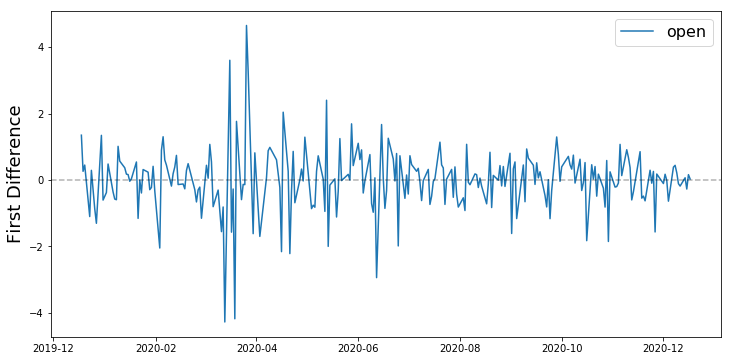

In [42]:
plt.figure(figsize=(12,6))
open_price, = plt.plot(data_f['open'])

plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['open'], fontsize=16)

C:\Users\Anila\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


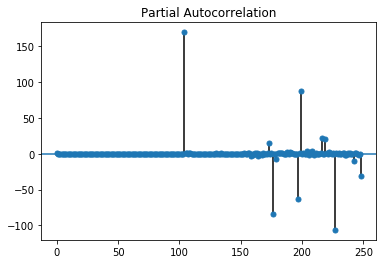

In [43]:
plot_pacf(data_f['high'])
plt.show()

# Fitting a VAR Model

In [44]:
data_f1 = data_f.loc[:,['open' ,'close', 'high', 'low', 'adj close' ,'volume','neg', 'neu' ,'pos' ,'compound']]

data_f2 = data_f1.dropna()
data_f2.isnull().sum()

open         0
close        0
high         0
low          0
adj close    0
volume       0
neg          0
neu          0
pos          0
compound     0
dtype: int64

In [45]:
model = VAR(data_f2)

model_fit = model.fit(maxlags =2)

C:\Users\Anila\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [46]:
model_fit.summary()

C:\Users\Anila\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1387: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 06, Jan, 2021
Time:                     20:00:36
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -47.3884
Nobs:                     247.000    HQIC:                  -49.1708
Log likelihood:           2926.18    FPE:                1.33494e-22
AIC:                     -50.3721    Det(Omega_mle):         0.00000
--------------------------------------------------------------------
Results for equation open
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                      -0.007241         0.041232           -0.176           0.861
L1.open                    -0.480928         0.080900           -5.945           0.000
L1.close      -49481060763166.953125 